In [2]:
%matplotlib inline
import d2l
from mxnet import image

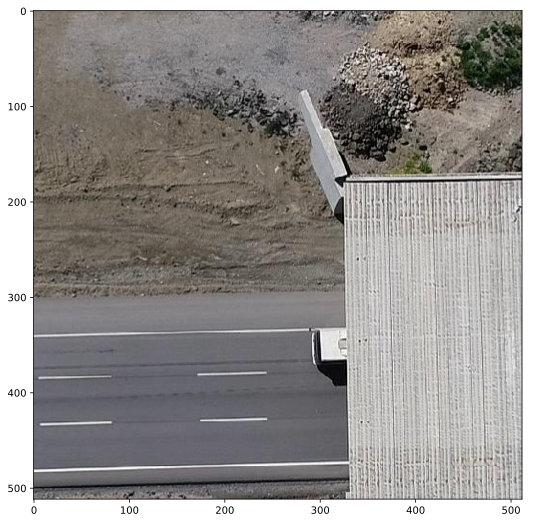

In [3]:
d2l.set_figsize((20, 9))
# img = image.imread('../data/external/visdrone/train/sequences/uav0000243_00001_v/0000690.jpg').asnumpy()
img = image.imread('/home/deep/python_projects/image_bbox_slicer/dst/images/t3/T190619_V1_K1/frame4140-03.jpg').asnumpy()
# img = image.imread('M0501_336.jpg')
d2l.plt.imshow(img);

In [15]:
import pickle

In [16]:
f = open('../data/t3-data/splits/all/test.pkl', 'rb')

p = pickle.load(f)

In [17]:
box = [file for file in p if 't3/T190619_V5_K1/frame6004.jpg' in file['filename']][0]

In [18]:
box

{'filename': 't3/T190619_V5_K1/frame6004.jpg',
 'width': 1920,
 'height': 900,
 'ann': {'bboxes': array([[ 973.86  ,  592.13  , 1034.71  ,  638.09  ],
         [ 282.48  ,  769.62  ,  320.86  ,  840.43  ],
         [ 906.06  ,  711.22  ,  917.64  ,  724.03  ],
         [ 896.81  ,  693.53  ,  910.7642,  706.166 ]], dtype=float32),
  'labels': array([2, 2, 1, 1]),
  'bboxes_ignore': [],
  'labels_ignore': []}}

In [19]:
boxes = box['ann']['bboxes']

labels = box['ann']['labels']

In [5]:
# Save to the d2l package.
def bbox_to_rect(bbox, color):
    """Convert bounding box to matplotlib format."""
    # Convert the bounding box (top-left x, top-left y, bottom-right x,
    # bottom-right y) format to matplotlib format: ((upper-left x,
    # upper-left y), width, height)
    return d2l.plt.Rectangle(
        xy=(bbox[0], bbox[1]), width=bbox[2]-bbox[0], height=bbox[3]-bbox[1],
        fill=False, edgecolor=color, linewidth=2)

In [6]:
# a = "684.9190063476562,252.16925048828125,708.6643676757812,293.4923095703125,1,950.4197387695312,623.475830078125,969.8232421875,656.496826171875,1,936.2626342773438,378.5890808105469,958.5247192382812,414.13397216796875,1,706.8612060546875,382.5089111328125,725.1490478515625,413.78082275390625,1,921.3556518554688,370.6524658203125,953.5877075195312,411.6452941894531,1,336.767822265625,94.61076354980469,355.2728576660156,129.2275390625,1,594.84326171875,93.1729507446289,619.3535766601562,133.77684020996094,1,607.1261596679688,65.7660140991211,629.4971923828125,100.54486083984375,1,1399.5333251953125,655.8367309570312,1458.319091796875,696.244140625,0,1785.0323486328125,408.79095458984375,1854.822998046875,447.46038818359375,0,274.41650390625,628.578857421875,340.1629638671875,669.723388671875,0,1114.5426025390625,469.6043395996094,1187.2275390625,511.9649353027344,0,1070.6802978515625,650.898193359375,1170.8411865234375,707.140380859375,0,1883.418701171875,351.62078857421875,1918.5595703125,387.88446044921875,0,527.1502075195312,817.6302490234375,593.9746704101562,858.6316528320312,0,1573.4896240234375,473.2643127441406,1638.5692138671875,510.32086181640625,0,0.0,104.20873260498047,62.49919509887695,312.26678466796875,0,0.0,132.6053009033203,59.103004455566406,183.7665252685547,0,1624.77783203125,663.907958984375,1825.105712890625,755.2982177734375,0"
# a = a.split(',')

# boxes = []
# for i in range(0, len(a), 5):
#     res = list(map(float, [a[i], a[i+1], a[i+2], a[i+3]]))
#     boxes.append(res)
        

In [7]:
import cv2

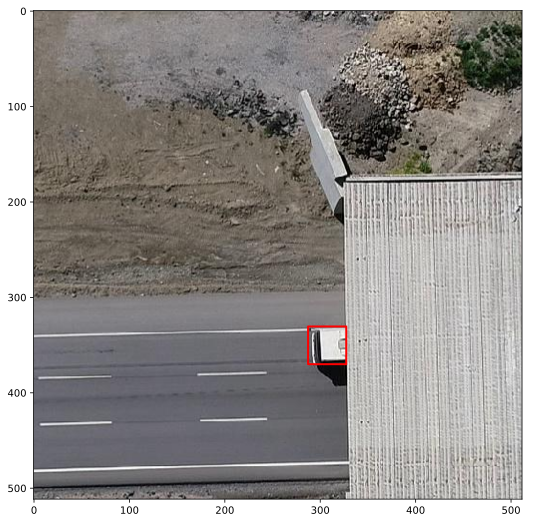

In [8]:
fig = d2l.plt.imshow(img)

# for box, label in zip(boxes, labels):
#     fig.axes.add_patch(bbox_to_rect(box, 'blue' if label == 1 else 'blue'))

bbb = [[287.26, 330.51, 327.26, 370.03]]
for box in bbb:
    fig.axes.add_patch(bbox_to_rect(box, 'red'))

# bbb = [[1105.15  ,  754.15  , 1127.82  ,  798.15  ],
#          [ 727.07  ,  372.79  ,  739.1939,  399.15  ],
#          [ 993.77  ,  330.17  , 1005.48  ,  358.17  ],
#          [ 902.37  ,  329.38  ,  916.08  ,  352.24  ]]

# for box in bbb:
#     fig.axes.add_patch(bbox_to_rect(box, 'green'))

In [162]:
import numpy as np

from PIL import Image

In [149]:
type(fig.get_figure())

matplotlib.figure.Figure

In [154]:
data = np.fromstring(fig.get_figure().canvas.tostring_rgb(), dtype=np.uint8, sep='').reshape(fig.get_figure().canvas.get_width_height()[::-1] + (3,))

/home/deep/miniconda3/envs/tensorflow_gpuenv/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  """Entry point for launching an IPython kernel.


In [168]:
fig.tostring_rgb()

AttributeError: 'AxesImage' object has no attribute 'tostring_rgb'

In [192]:
fig.get_figure().gca()

In [186]:
canvas

In [193]:
ax = fig.get_figure().gca()

# ax.text(0.0,0.0,"Test", fontsize=45)
ax.axis('off')

canvas.draw()       # draw the canvas, cache the renderer

image = np.fromstring(canvas.tostring_rgb(), dtype='uint8')

/home/deep/miniconda3/envs/tensorflow_gpuenv/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


In [195]:
image.shape

(2799360,)

In [180]:
canvas = fig.get_figure().canvas
buf = canvas.tostring_rgb() 

im_size = canvas.get_width_height() 

pil_image = Image.frombytes("RGB", im_size, buf) 

In [184]:
np.array(pil_image).shape

(648, 1440, 3)

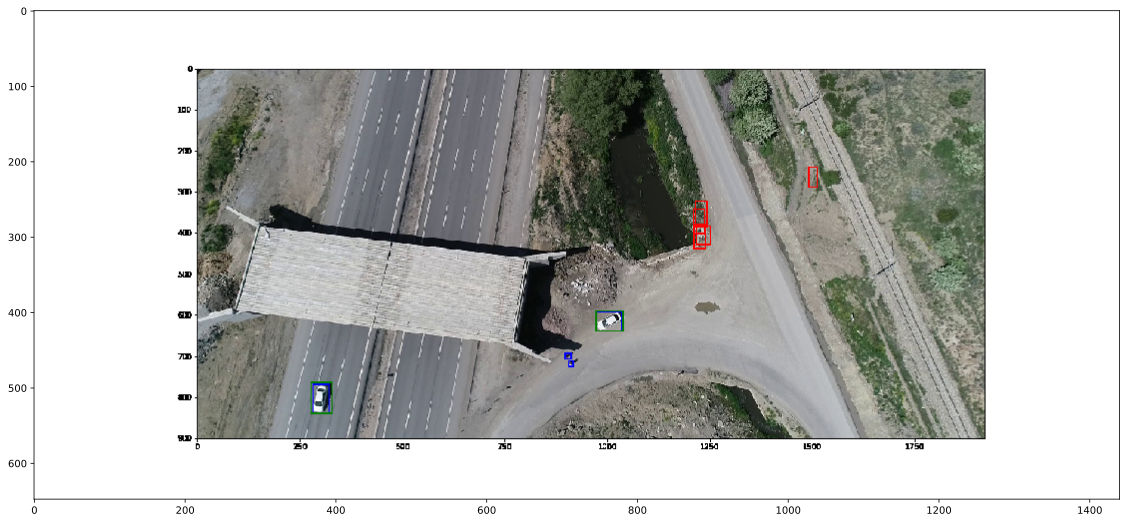

In [157]:
plt.imshow(data)